## Introduction

### Dataset Description 

> The dataset I am using for amalysis is the no-show appointments dataset sourced from Kaggle. The datasets contains information from 100k medical appointments in brazil, to see how many people showed up for their medical appointments. The dataset takes into account for the age and gender of the patients, the day the patient was scheduled and also the appointment day. If the patient is enrolled in the Brasillian Welfare Program and if the patient has any diesease like hrpertension and diabetes, if the patient is an alcohol addict and if the patient is handicapped. Also, takes collects data to see if the patient received sms reminders.
#### Dataset Information
>PatientID - Information about the patient<br>
>AppointmentID - Information about the appointment<br>
>Gender - given as F(female) and M(male)<br>
>SchedulDay - day scheduled<br>
>AppointmentDay - appointment day<br>
>Age  - age of the partients. <br>
>Neighbourhood - hospital neigbourhood. <br>
>Scholarship - Brasillian Welfare Program(true or false) <br>
>Hipertension - True or False <br>
>Diabetes - True or False <br>
>Alcoholism- True or False <br>
>Handcap - True or False <br>
>Sms_received - True  or False <br>
>No-show = No for if the patient attended and Yes for if the patient did not atte

### Question(s) for Analysis
> Do patients who receive sms reminders show up more than those who do not?<br>
> What gender is more-likely to show up for appointments?<br>
> What age is more likely to show up for appointments?<br>
> What is the age suffers the most from alcholoism?


In [65]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

## Data Wrangling

> Checking the general properties of the data

In [66]:
# Loading data
df = pd.read_csv("no_show.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
df.shape

(110527, 14)

In [68]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [69]:
# checks for duplicates
sum(df.duplicated())

0

In [70]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

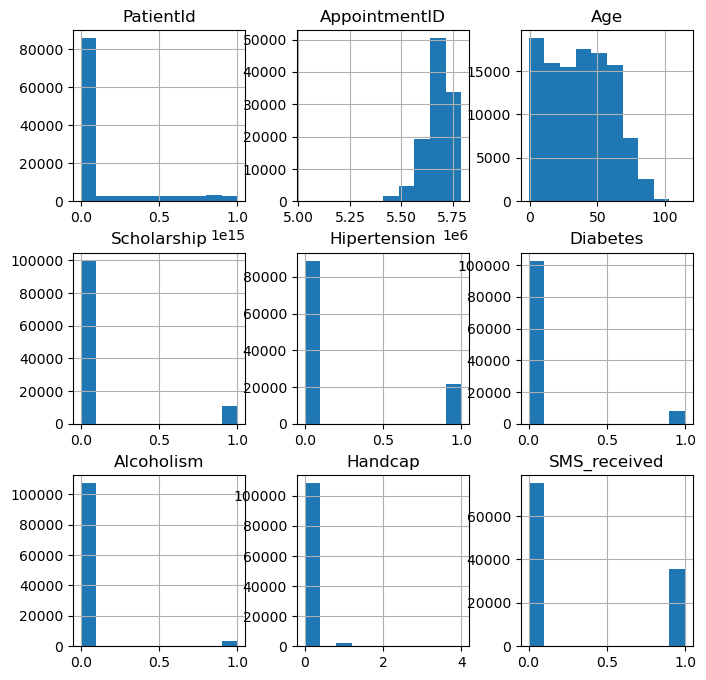

In [71]:
df.hist(figsize=(8,8))

### Data Cleaning
> After viewing the structure of the data, I decided to drop the patientId and appointmentId columns. Also, in the age column, the maximum value there is 115 and the minimum value is -1, I have decided to drop vaues less than 0 in the age column. For the Alcoholism, Diabetes, handicap, Hypertension and Scholarship columns, I am coverting the datatype to boolean for easy understanding. 

In [72]:
# drop unwanted columns
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
# Deleting rows in age that are outliers
df.query('Age < 0')


df.query('Age > 100')
df.drop(index = [99832, 58014, 63912, 63915, 68127, 76284, 90372, 97666], inplace = True)
df.query('Age > 100')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [74]:
# Making the column names lower case
df.rename(columns = lambda x: x.strip().lower(), inplace= True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [75]:
# renaming the column
df.rename(columns = {'no-show' : 'no_show'}, inplace = True)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [76]:
# converting 0's and 1's in scholarshp, hipertension, diabetes, alcoholism, handicap and sms received columns to boolean
columns= ['scholarship','hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']
for c in columns:
    df[c]= df[c].astype('bool')
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,False,False,No


## Exploring the Data

### Research Question 1: Do patients who receive sms reminders show up more than those who do not?

In [77]:
def plot_bar(data, var): 
    '''
    docsting: function to plot a bar plot
    input: data and the vairable to plot by making no_show constnt
    output: plot a bar plot by grouping a given variable with no_show
    '''
    colors = ['blue', 'red']
    df.groupby(var)['no_show'].value_counts(normalize=True).mul(100).unstack(var).plot.bar(rot = 0, color=colors);
    plt.title(f'How does {var} affect patient attendance'.title(), fontsize= 16, weight= "bold")
    plt.xlabel('Missed'.title(), fontsize = 10, weight="bold")
    plt.ylabel('percentage'.title(), fontsize = 10, weight="bold")

In [78]:
# filtering the data for patients that showed up for appointments
showed_up = df[df['no_show'] == "No"]
total_sms = sum(showed_up['sms_received'].value_counts())
received = showed_up['sms_received'].value_counts()[1]/total_sms
didnt_receive = showed_up['sms_received'].value_counts()[0]/total_sms



Text(0.5, 0, 'SMS Received')

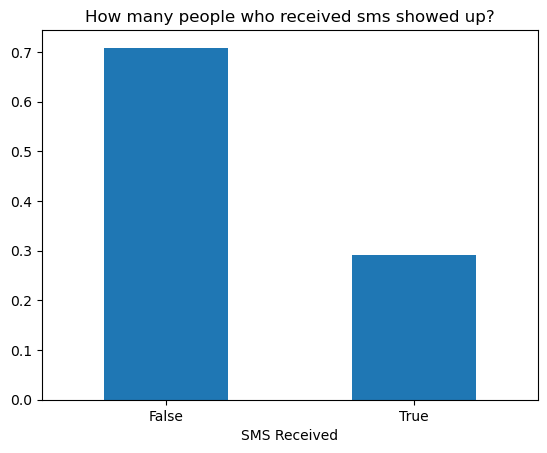

In [79]:
# plotting the chart for sms_received
showed_up['sms_received'].value_counts(normalize=True).plot.bar(rot=0)
plt.title("How many people who received sms showed up?")
plt.xlabel("SMS Received")

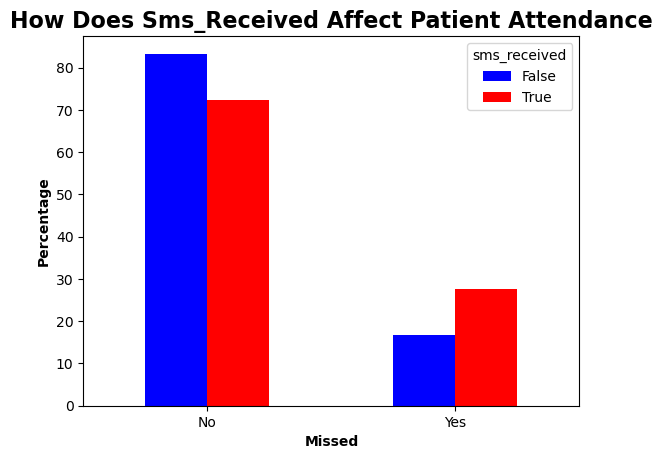

In [80]:
# Bar to check the impact of sms received on the attendance of appointment
plot_bar(df,'sms_received')

#### Patients who did not receive sms reminders showed up more than those who did!

### Research Question 2: What gender tends to show up more for appointments?

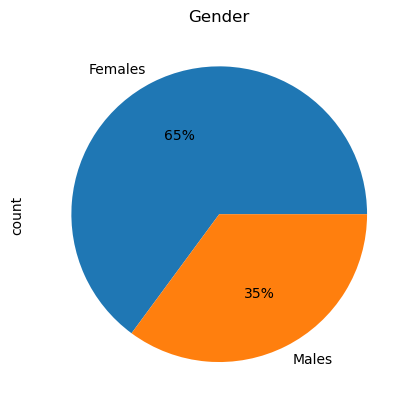

In [81]:
# plotting the chart for what gender shows up more

showed_up.gender.value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("count")
plt.title("Gender");

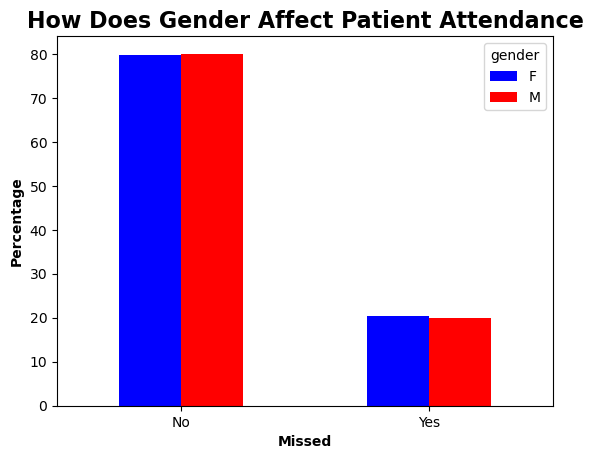

In [82]:
# plotting a graph to show what gender showed up more and what gender showed up less
plot_bar(df,'gender')

#### The proportion of male patient that shows up for appointment is greater than that of female patients and the proportion of female patients that do not show up is more than the male patient.

### Research 3:  What is the Age is likely to show-up or miss appointments?

Text(0, 0.5, 'Number of Patients')

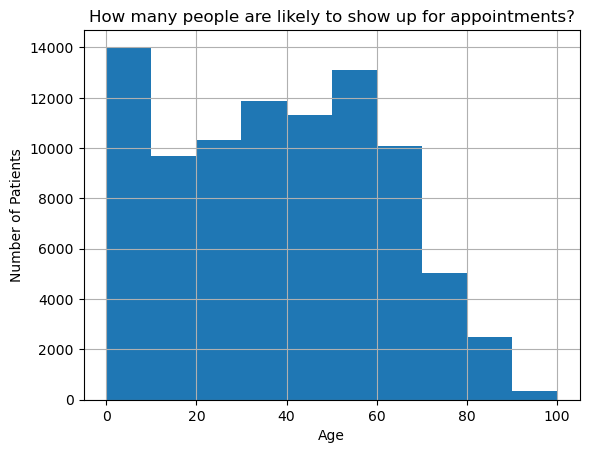

In [84]:
# Nuber of ptients likely to show up for appointments
showed_up['age'].hist()
plt.title("How many people are likely to show up for appointments?")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

#### 0-10 years old has the highest number of people showing up for their appointments with over 14000 showing up

Text(0.5, 0, 'Age')

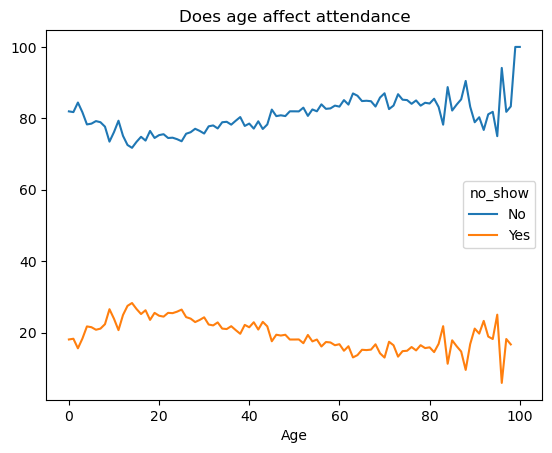

In [85]:
# Does age affect attendance
df.groupby('age')['no_show'].value_counts(normalize = True).unstack('no_show').mul(100).plot()
plt.title("Does age affect attendance")
plt.xlabel("Age")

### Research Question 4: What age suffers from alcoholism the most?

Text(0, 0.5, 'Number of Patients')

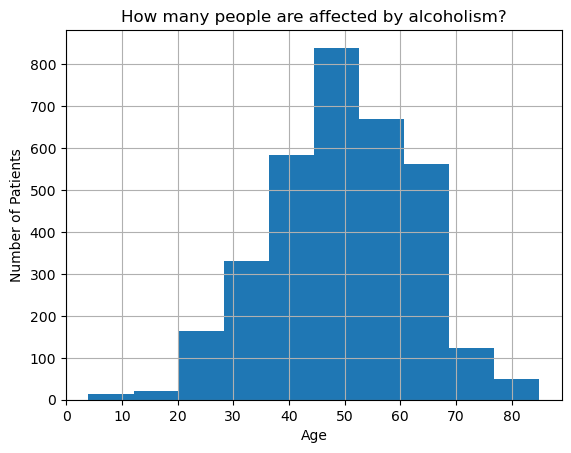

In [86]:
# filtering the data for alcoholism
alcoholism = df[df['alcoholism']==True] 
# Number of patients affected by alcoholism
alcoholism['age'].hist()
plt.title("How many people are affected by alcoholism?")
plt.xlabel("Age")
plt.ylabel('Number of Patients')

#### Patients who are 45-55 suffers from alcoholism the most, going as high as over 8000 patients.

Text(0.5, 0, 'Age')

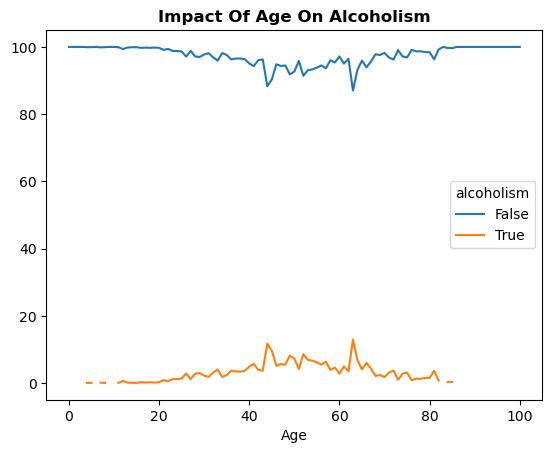

In [87]:
# Impact of age on alcohol
df.groupby('age')['alcoholism'].value_counts(normalize = True).unstack('alcoholism').mul(100).plot()
plt.title("Impact of Age on Alcoholism".title(),weight='bold')
plt.xlabel("Age")

##### Most of the patients are not alcoholics.

## Conclusion

> Overall more peole attended their appointments, with people who didn't receive the sms attending more and people eho received the sms missing the most. <br>
> The proportion of male patient that shows up for appointment is greater than that of female patients and the proportion of female patients that do not show up is more than the male patient. <br>
> 0 - 10 years old are more likely to attend their appointments, this would probably be because they are stll young and are taken by their parents for periodic checks.<br>
> Most of the patients are not alcoholics. The result shows that the ages with the highest non-alcoholics is from 0-20 and 80-100. While, the ages with the highest alcoholics is between 40-45 and between 60-65.


### Limitations

> A limitation was that with most of the data type being in categorical rather the in numeric type, I couldn't perform analysis to see if a disease is related to the other.